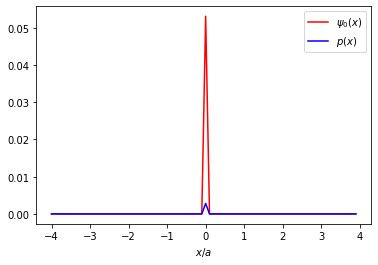

In [116]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy import integrate
from scipy.misc import derivative
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.hermite as Hermite

hbar = 1.

fig1 = plt.figure()
ax1 = fig1.add_subplot()

def hermite(x, n):
    xi = a*x
    herm_coeffs = np.zeros(int(n)+1)
    herm_coeffs[int(n)] = 1
    return Hermite.hermval(xi, herm_coeffs)

def psi(x,n):
    xi = a*x
    prefactor = 1./np.sqrt(2.**n * np.math.factorial(float(n)) * np.sqrt(np.pi*a**2)) 
    psi = prefactor * np.exp(- xi**2 / 2) * hermite(x,n)
    return psi

x_arr = np.arange(-4, 4, 0.1)

ax1.plot(x_arr, psi(x_arr, 0), 'r', label=r"$\psi_0(x)$")
ax1.plot(x_arr, abs(psi(x_arr,0))**2, 'b', label=r"$p(x)$")
ax1.set_xlabel(r'$x/a$')
ax1.legend()


In [22]:
for i in [0, 1, 3, 4, 7]:
    inte = integrate.quad(np.vectorize(lambda x: psi(x, 0)*psi(x, i)), -float("inf"), float("inf"))[0]
    print(f"integral of psi{0} * psi{i} = {inte} ≈ {round(inte)}")

integral of psi0 * psi0 = 1.0 ≈ 1
integral of psi0 * psi1 = 0.0 ≈ 0
integral of psi0 * psi3 = 0.0 ≈ 0
integral of psi0 * psi4 = -5.828670879282072e-16 ≈ 0
integral of psi0 * psi7 = 0.0 ≈ 0


In [29]:
inte = integrate.quad(np.vectorize(lambda x: psi(x, 0)*x*psi(x, 0)), -float("inf"), float("inf"))[0]
print(f"integral of psi{0} * x * psi{0} = {inte} ≈ {round(inte)}")

integral of psi0 * x * psi0 = 0.0 ≈ 0


In [51]:
inte = hbar*integrate.quad(np.vectorize(lambda x: psi(x, 0)* (-x/a**2) * psi(x, 0)), -float("inf"), float("inf"))[0]
print(f"integral of psi{0} * p * psi{0} = {inte} ≈ {round(inte)}")

integral of psi0 * p * psi0 = 0.0 ≈ 0


In [28]:
inte = integrate.quad(np.vectorize(lambda x: psi(x, 0)*x**2*psi(x, 0)), -float("inf"), float("inf"))[0]
print(f"integral of psi{0} * x^2 * psi{0} = {inte} ≈ a^2/2")

integral of psi0 * x^2 * psi0 = 0.5000000000000012 ≈ a^2/2


In [86]:
inte = -1j*hbar**2*integrate.quad(np.vectorize(lambda x: psi(x, 0)* (-x/a**2) * psi(x, 0)), -float("inf"), float("inf"))[0]
print(f"integral of psi{0} * p^2 * psi{0} = {inte}")

integral of psi0 * p^2 * psi0 = 0j


In [6]:
inte = -hbar**2*integrate.quad(np.vectorize(lambda x: psi(x, 0)* ( (x**2 - a**2) / a**4) * psi(x, 0)), -float("inf"), float("inf"))[0]
print(f"integral of psi{0} * p^2 * psi{0} = {inte} ≈ hb^2/2a^2")

integral of psi0 * p^2 * psi0 = 0.4999999999999988 ≈ hb^2/2a^2


In [19]:
def psi0(x): return psi(x, 0)

inte = -hbar*1j*integrate.quad(np.vectorize(lambda x : psi0(x) * derivative(psi0, x, dx=0.0001, n=1)), -float("inf"), float("inf"))[0]
print(inte)

-0j


In [20]:
inte = -hbar**2*integrate.quad(np.vectorize(lambda x : psi0(x) * derivative(psi0, x, dx=0.0001, n=2)), -float("inf"), float("inf"))[0]
print(inte)

0.49999999797230144


In [81]:
import csv
with open('data.csv', mode='w') as data_file:
    data_writer = csv.writer(data_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    data_writer.writerow(["order", 'Dx', 'Dp', 'DxDp'])
    for order in range(0, 11):
        def psi_n(x): return psi(x, order)
        ex_x = integrate.quad(np.vectorize(lambda x: psi(x, order)*x*psi(x, order)), -float("inf"), float("inf"))[0]
        ex_x2 = integrate.quad(np.vectorize(lambda x: psi(x, order)*x**2*psi(x, order)), -float("inf"), float("inf"))[0]
        ex_p = -hbar*1j*integrate.quad(np.vectorize(lambda x : psi_n(x) * derivative(psi_n, x, dx=0.0001, n=1)), -float("inf"), float("inf"))[0]
        ex_p2 = -hbar**2*integrate.quad(np.vectorize(lambda x : psi_n(x) * derivative(psi_n, x, dx=0.0001, n=2)), -float("inf"), float("inf"))[0]
        print(f"------\torder: {order}\t------")
        print(f"<x>^2\t{ex_x**2}\n<x^2>\t{ex_x2}")
        print(f"<p>^2\t{ex_p**2}\n<p^2>\t{ex_p2}")
        Dx = np.math.sqrt(ex_x2 - ex_x**2)
        Dp = np.math.sqrt(ex_p2 - abs(ex_p)**2)
        DxDp = Dx*Dp
        print(f"Dx\t{Dx}\nDp\t{Dp}")
        print(f"DxDp\t{DxDp}")
        data_writer.writerow([order, Dx, Dp, DxDp])

------	order: 0	------
<x>^2	0.0
<x^2>	0.5000000000000012
<p>^2	0j
<p^2>	0.49999999789637256
Dx	0.7071067811865483
Dp	0.7071067796990583
DxDp	0.49999999894818686
------	order: 1	------
<x>^2	0.0
<x^2>	1.4999999999999993
<p>^2	0j
<p^2>	1.4999999990872628
Dx	1.2247448713915887
Dp	1.2247448710189657
DxDp	1.499999999543631
------	order: 2	------
<x>^2	0.0
<x^2>	2.4999999999999996
<p>^2	0j
<p^2>	2.4999999940986934
Dx	1.5811388300841895
Dp	1.5811388282180328
DxDp	2.4999999970493465
------	order: 3	------
<x>^2	0.0
<x^2>	3.4999999999999996
<p>^2	0j
<p^2>	3.4999999801782478
Dx	1.8708286933869707
Dp	1.8708286880893845
DxDp	3.499999990089124
------	order: 4	------
<x>^2	0.0
<x^2>	4.5
<p>^2	0j
<p^2>	4.499999974881446
Dx	2.1213203435596424
Dp	2.1213203376391427
DxDp	4.499999987440723
------	order: 5	------
<x>^2	0.0
<x^2>	5.5
<p>^2	0j
<p^2>	5.499999966118
Dx	2.345207879911715
Dp	2.345207872688048
DxDp	5.499999983058999
------	order: 6	------
<x>^2	0.0
<x^2>	6.500000000000001
<p>^2	0j
<p^2>	6.49999

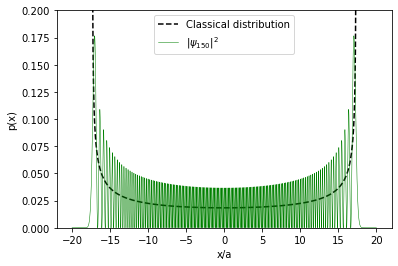

In [234]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()

n = 150

hbar = 1
m = 1
w = 1
a = np.sqrt(hbar / (m*w))
E = hbar*w*(n+(1/2))
amplitude = np.sqrt( (2*E) / (m*w**2) )

def classical(x):
    return 1/(np.pi*np.sqrt(amplitude**2-x**2))

def hermite(x, n):
    herm_coeffs = np.zeros(n+1)
    herm_coeffs[n] = 1
    return Hermite.hermval(x/a, herm_coeffs)
  
def stationary_state(x,n):
    prefactor = 1./np.sqrt(2.**n * np.math.factorial(n) * np.sqrt(np.pi*a**2))
    psi = prefactor * np.exp(- x**2 / (2*a**2)) * hermite(x,n)
    return psi

def bohr(x, n):
    return stationary_state(x, n)**2

xs = np.arange(-20, 20, 0.001)

ax2.plot(xs, classical(xs), 'k--', label="Classical distribution")
ax2.plot(xs, bohr(xs, n), 'g', label=r'$|\psi_{150}|^2$', linewidth=0.5)
ax2.set_xlabel("x/a")
ax2.set_ylabel("p(x)")
ax2.set_ylim(0,0.2)
ax2.legend()

0
